<a href="https://colab.research.google.com/github/NSNNNN/xgboost-ensemble-learning/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Description

This project implements an XGBoost classification model on the Bank Marketing dataset.
The initial notebook structure was adapted from an open-source GitHub project and
extended with additional preprocessing, model training, evaluation, and visualization.

## Data Source
UCI Bank Marketing Dataset  
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## Code Reference
Original project inspiration:
https://github.com/AnMol12499/DataScience-project-using-XGBoost

The final implementation, model training, evaluation, and results were completed
by the project team.


In [1]:
!pip install xgboost scikit-learn pandas matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bank.csv to bank (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('bank.csv')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Accuracy: 0.8374384236453202
[[957 209]
 [154 913]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1166
           1       0.81      0.86      0.83      1067

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



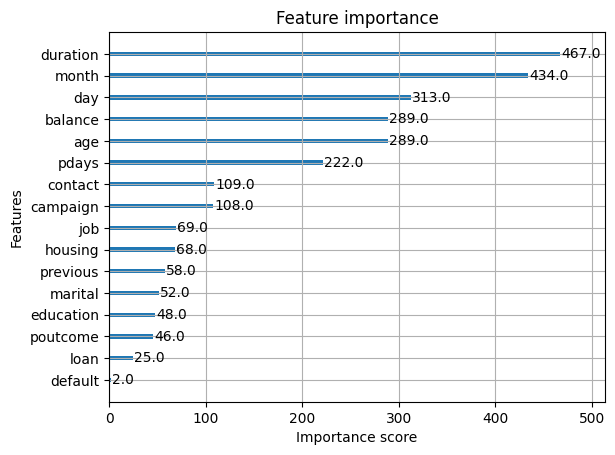

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical features
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

xgb.plot_importance(model)
plt.show()
